In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [17]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORT SALE INFORMATION DATA

In [43]:
# there are 2 types of dataset that we have
# sales_df ---> Sales Transactiona made on particular dates
# store_df ---> Store data.
sales_df= pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
### almost a million observation 
#### 1115 unique stores in the store datatset.
#### Note that sales is the target variable (that's what we are trying predict) 
##### Store: unique store Id
##### DayOfWeek: Monday, Tuesday.....
##### Sales: sales/day, this is the target variable 
##### Customers: number of customers on a given day in a particular store.
##### Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
1    844392
0    172817
##### Promo: describes if store is running a promo on that day or not
##### StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
###                                      0    855087   0    131072    a     20260   b      6690     c      4100
##### SchoolHoliday: indicates if the (Store) was affected by the closure of public schools
#### 0    835488        1    181721  (0 = no holiday, 1 = holiday)
 
##### THE RECOREDS IN THE SALES DATATSET IS FROM 2013-01-01 TO 2015-07-31 ---> 2.7 Years,----> 31 Months 

#StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
#SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

#####- Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

In [44]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [45]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [46]:
sales_df['Date'].max()

'2015-07-31'

In [47]:
sales_df['Date'].min()

'2013-01-01'

In [48]:
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [49]:
sales_df['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [50]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [51]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

# IMPORT STORE INFORMATION DATA

In [ ]:
## Store: unique store Id
# StoreType: categorical variable to indicate type of store (a, b, c, d) # what kind of store. Indicative of type of store models.
### Some store might have larger square footage or some might be in an attractive loaction or 
# Assortment: describes an assortment level: a = basic, b = extra, c = extended # Depends on size and location of store
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSinceMonth: provides an estimate of the month when competition was open
# CompetitionOpenSinceYear: provides an estimate of the year when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2SinceYear: start year fpor  Promo2
# Promo2SinceWeek: start week fpor  Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


In [ ]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study 


In [30]:
store_df = pd.read_csv('/content/drive/MyDrive/Dataset/store.csv')

In [31]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [34]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [35]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## **EDA----> TRANSACTION INFORMATION DATA**

In [52]:
sales_df.isnull().sum() # Transaction dataset

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a8e13aa50>,
      dtype=object)

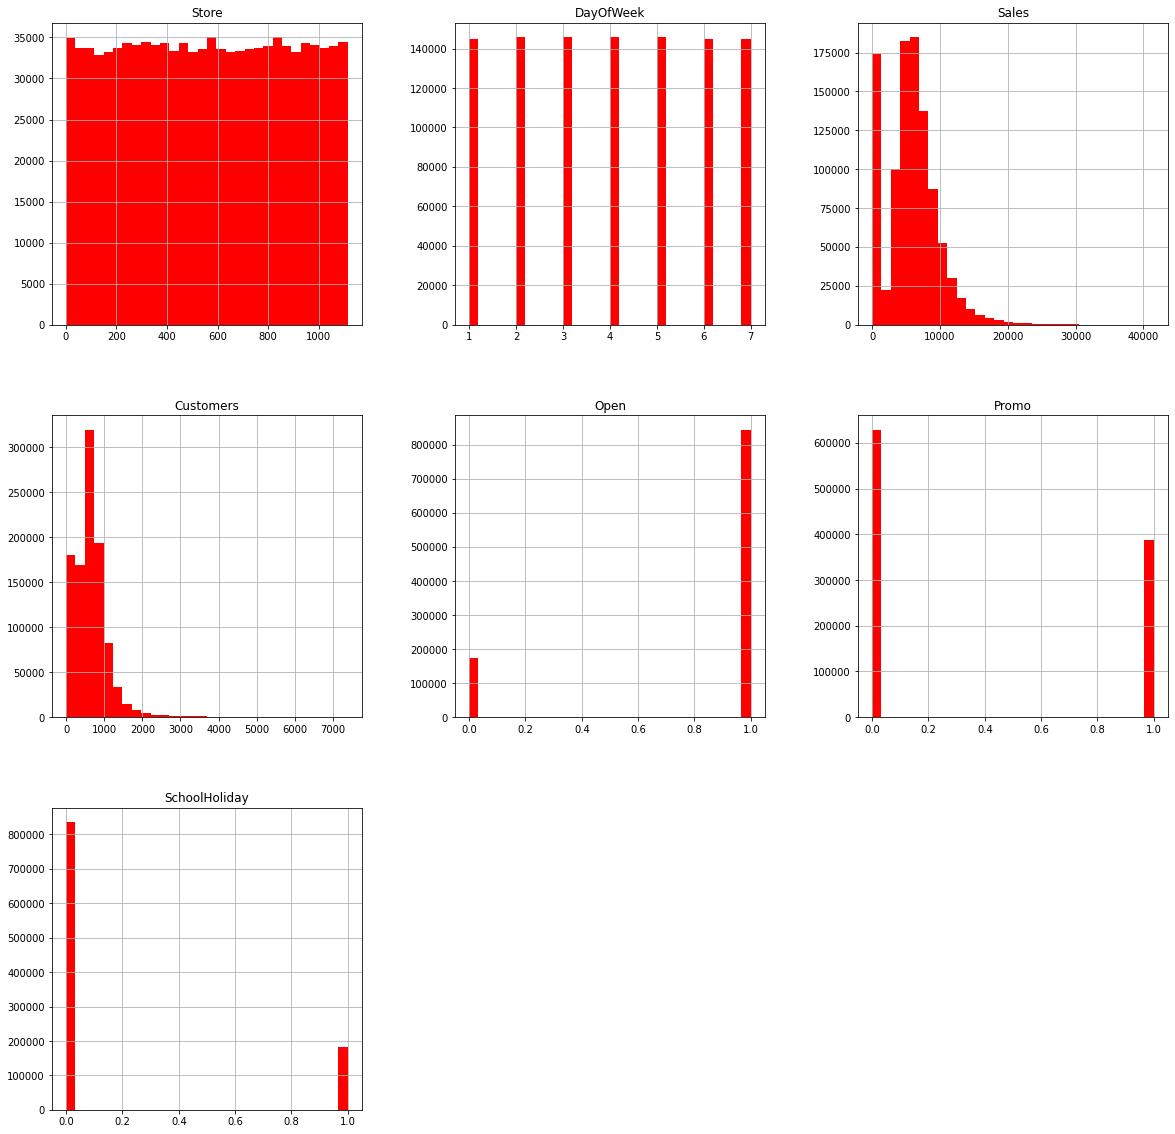

In [54]:
sales_df.hist(bins=30,figsize=(20,20), color='r')

In [ ]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time

In [55]:
# Maximum number of customer
sales_df['Customers'].max()

7388

In [56]:
# See how many stores are open/closed
closed_train_df = sales_df[sales_train_df['Open']==0]
open_train_df = sales_df[sales_train_df['Open']==1]

In [57]:
print('Total Closed Stores =', len(closed_train_df))
print('*****************************************')
print('Total Open Stores =', len(open_train_df))

Total Closed Stores = 172817
*****************************************
Total Open Stores = 844392


In [58]:
# See how many stores are open/closed
sales_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [59]:
# Removing the data for the closed stores
sales_df = sales_df[sales_df['Open']==1]

In [60]:
sales_df.shape

# When both the open and closed stores were included then len of dataset= 1017209
# When only open stores were included then len of dataset=  844392

(844392, 9)

In [61]:
# Droping the open column as no more required as all stores are now only for open category
sales_df = sales_df.drop(columns=['Open'],axis=1)

In [62]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [63]:
# after droping the closed store values the statistics have changed
# check for the new statistics of dataset.
# Average sales = 6955 Euros,	average number of customers = 762	(went up)
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


## EDA ON STORE INFORMATION ***DATA*** 

In [ ]:
# checking for missing data in both the daatsets

store_df.isnull().sum() # Store dataset

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [65]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros 

df_no_Promo2= store_df[store_df['Promo2']==0]


In [66]:
len(df_no_Promo2)

544

In [67]:
df_no_Promo2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN


In [69]:
# Setting these columns to 0--> ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing so we set that to 0 too
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in str_cols:
    store_df[str].fillna(0, inplace = True)

In [70]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [71]:
# placing the CompetitionDistance missing value  with average value.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace = True)

In [72]:
 store_df.isnull().sum() # ALL NULL VALUES GONE,

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a8ca83850>,
      dtype=object)

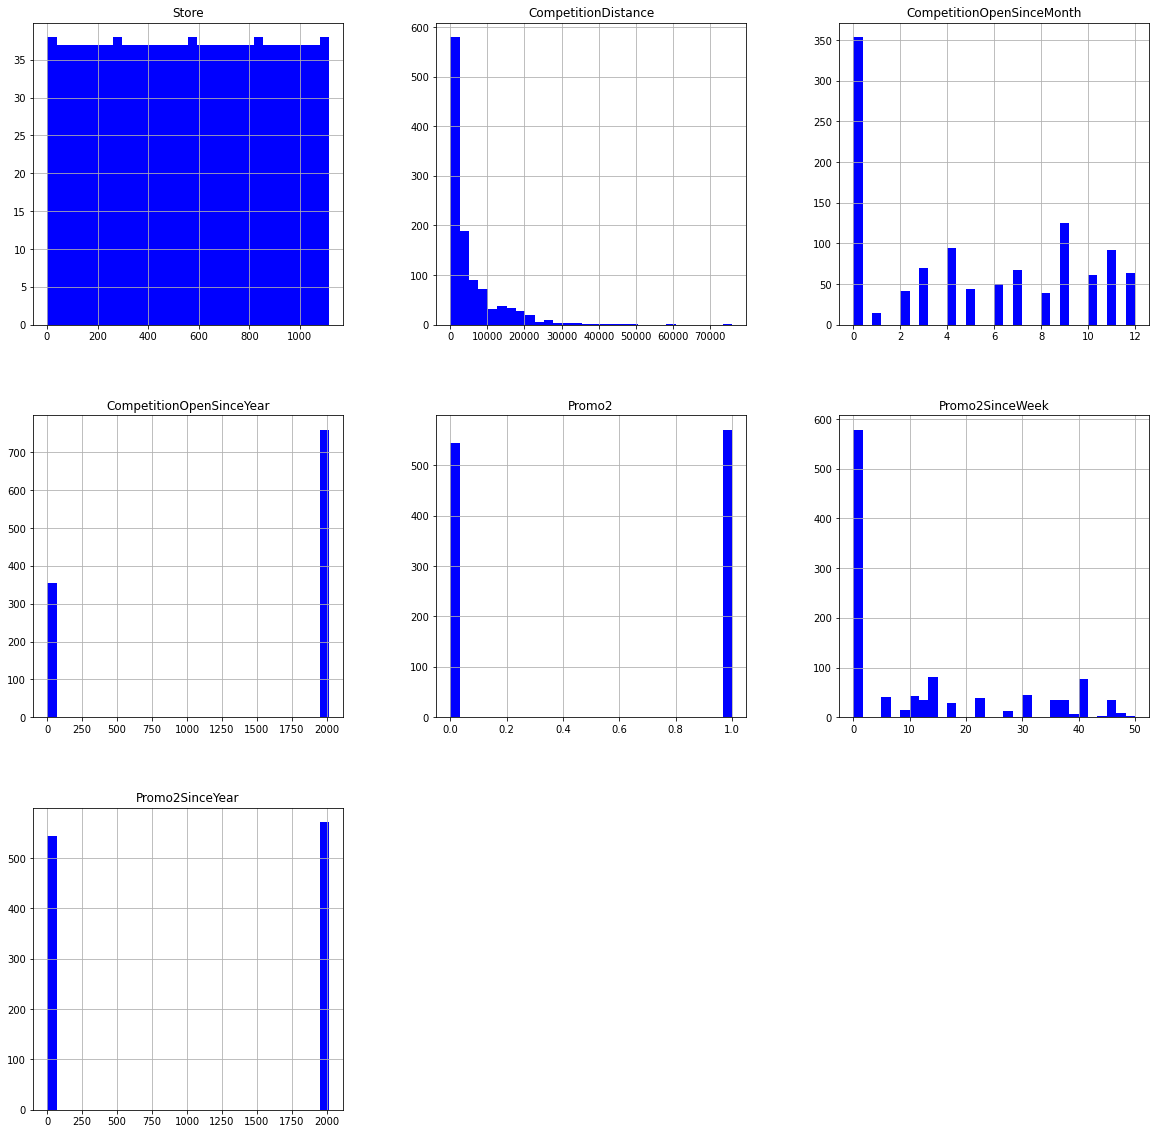

In [73]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)
# Plotting the histogram
store_df.hist(bins=30, figsize=(20,20), color='b')

## ***Explore Merged Dataset***

In [93]:
# Let's merge both data frames together based on 'store'
# merging based on store column
df_all= pd.merge(sales_df,store_df, how='inner', on='Store')

In [94]:
df_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [95]:
# checking for correlation
corr = df_all.corrwith(df_all.Sales)

In [96]:
corr

Store                        0.007710
DayOfWeek                   -0.178736
Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
SchoolHoliday                0.038617
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
Promo2SinceYear             -0.127621
dtype: float64

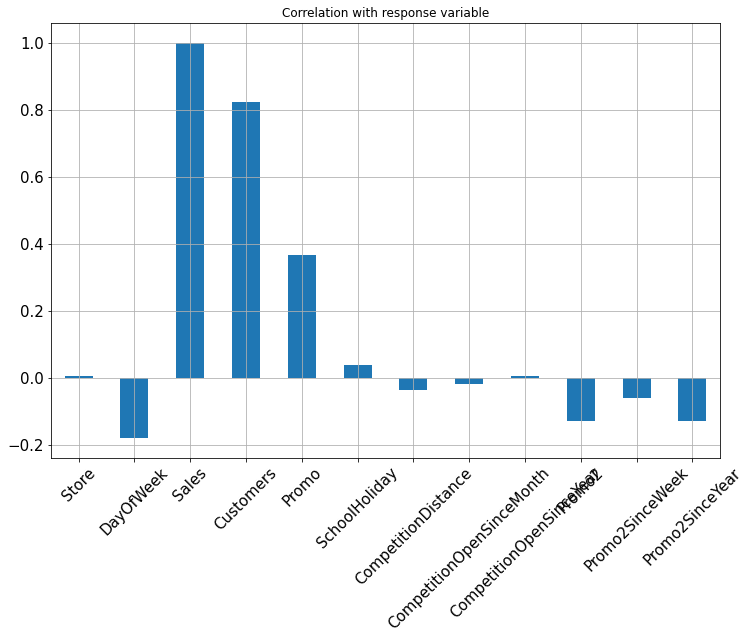

In [97]:
corr.plot.bar(figsize=(12,8), title='Correlation with response variable', fontsize=15, rot=45, grid=True)

In [98]:
corr2 =  df_all.corr()

In [99]:
import seaborn as sns

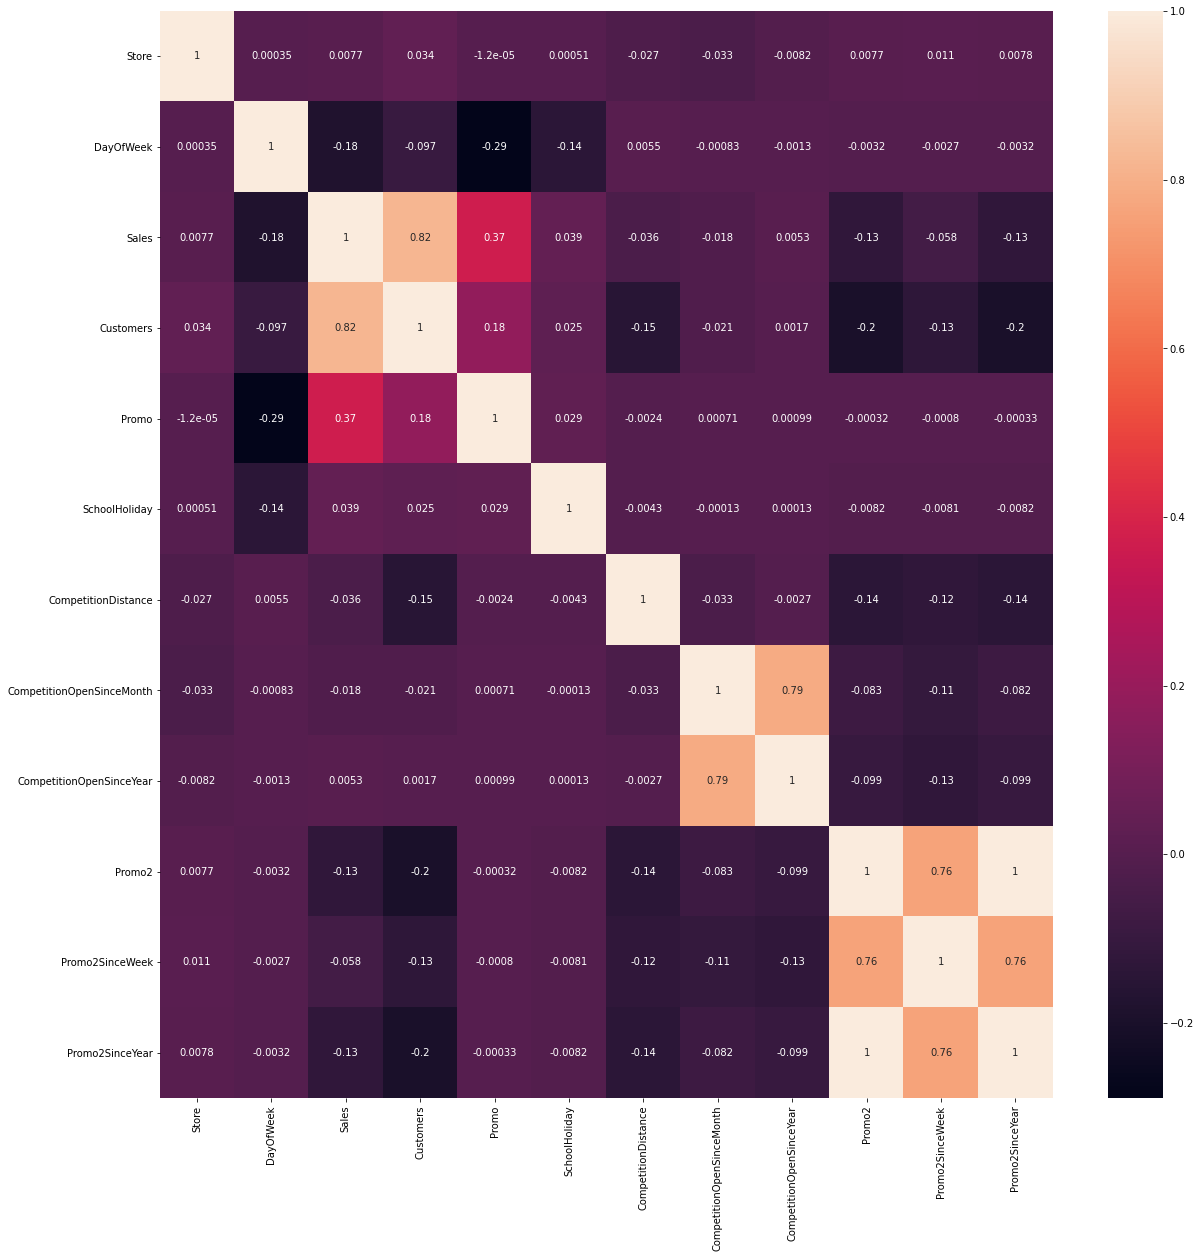

In [100]:
# Plotting heat map
plt.figure(figsize=(20,20))
sns.heatmap(corr2,annot=True)

In [101]:
# Seperate the Year Month and Date from Date column
df_all['Year']= pd.DatetimeIndex(df_all['Date']).year

In [102]:
# made a new column at the end called year.
df_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015


In [103]:
# made 2 new columns at the end called month and day.
df_all["Months"]= pd.DatetimeIndex(df_all['Date']).month
df_all['Date_of_month']= pd.DatetimeIndex(df_all['Date']).day

In [104]:
df_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Months,Date_of_month
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


<Figure size 432x288 with 0 Axes>

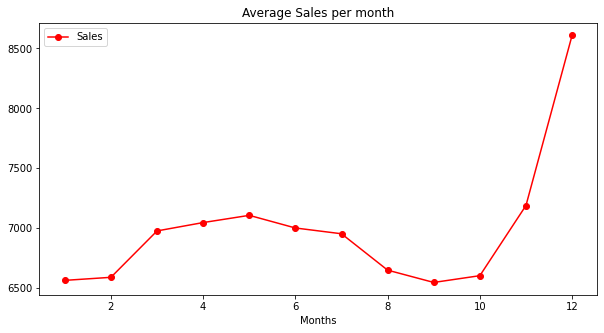

<Figure size 432x288 with 0 Axes>

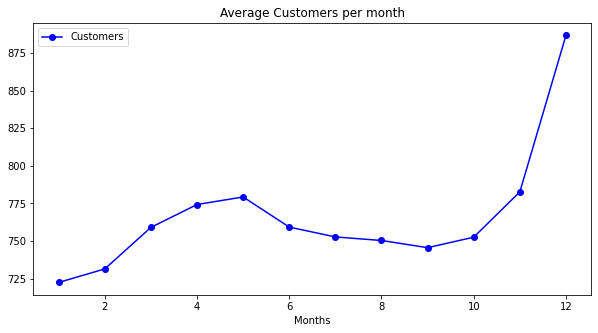

<Figure size 432x288 with 0 Axes>

In [105]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe
# x axis--> months
# y axis--> avg sales/customers per month.

axis= df_all.groupby('Months')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Average Sales per month')
plt.figure()

# average customers per month

axis= df_all.groupby('Months')[['Customers']].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('Average Customers per month')
plt.figure()


<Figure size 432x288 with 0 Axes>

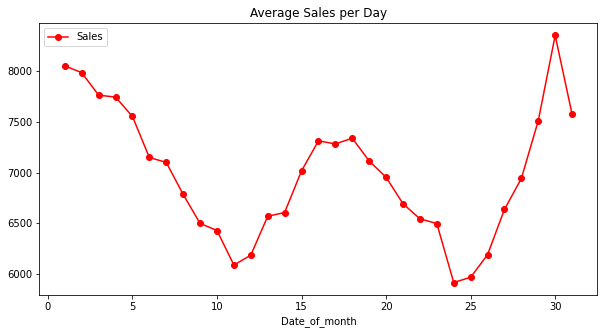

<Figure size 432x288 with 0 Axes>

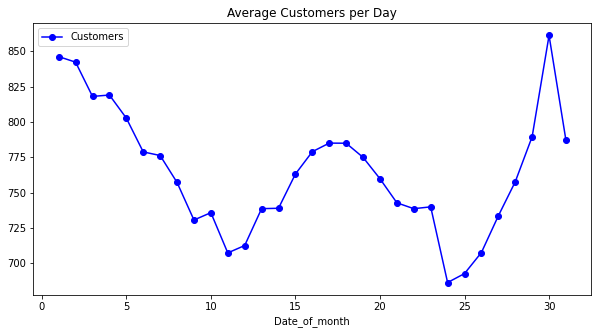

<Figure size 432x288 with 0 Axes>

In [107]:
# Let's take a look at the sales and customers per day of the month
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month

axis= df_all.groupby('Date_of_month')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Average Sales per Day')
plt.figure()

# average customers per day

axis= df_all.groupby('Date_of_month')[['Customers']].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('Average Customers per Day')
plt.figure()


<Figure size 432x288 with 0 Axes>

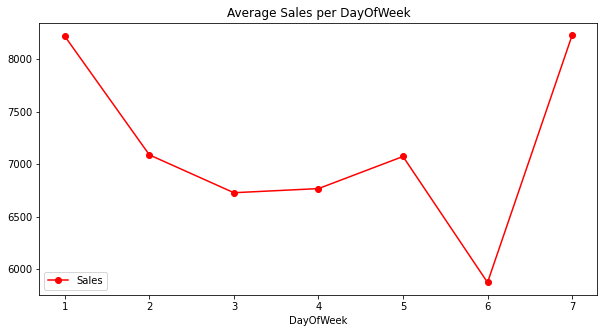

<Figure size 432x288 with 0 Axes>

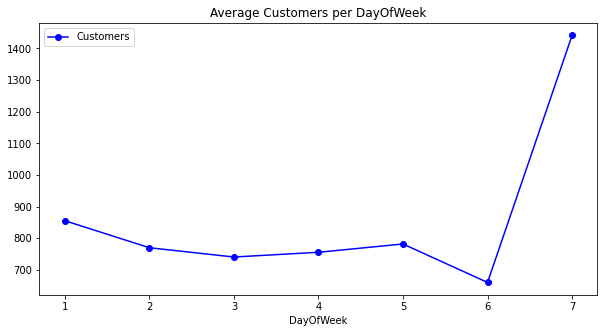

<Figure size 432x288 with 0 Axes>

In [108]:
# Let's do the same for the day of the week  (note that 7 = Sunday)  'DayOfWeek

axis= df_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker='o', color='r')
axis.set_title('Average Sales per DayOfWeek')
plt.figure()

# average customers per day

axis= df_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker='o', color='b')
axis.set_title('Average Customers per DayOfWeek')
plt.figure()



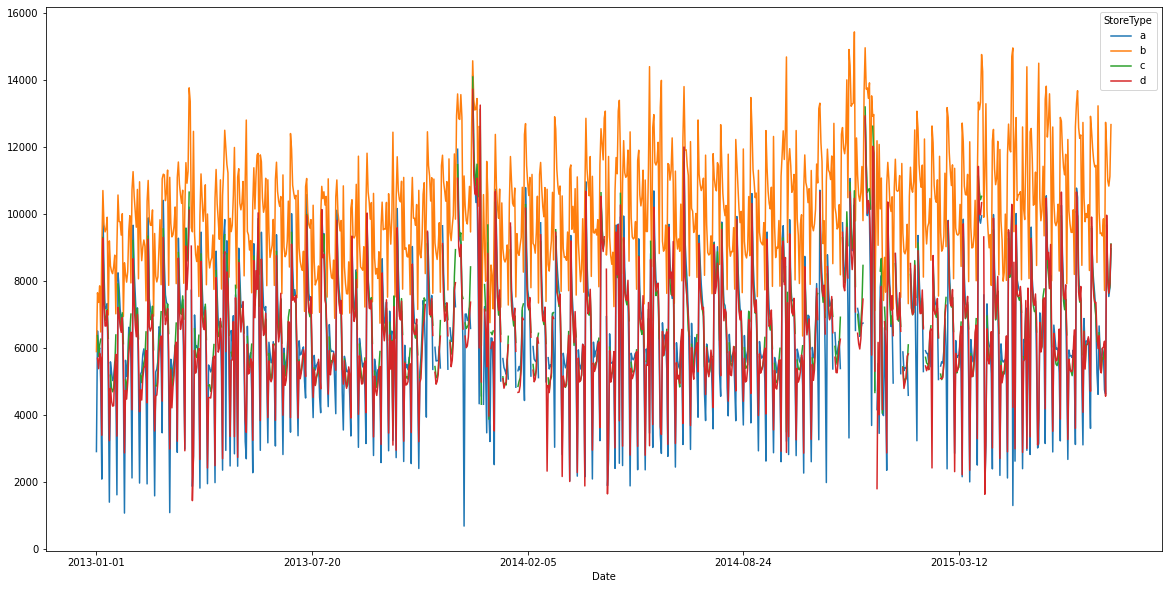

In [109]:
# Plot all the date and store type
# what type of store type is giving what type of data

fig, ax = plt.subplots(figsize=(20,10))
df_all.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)


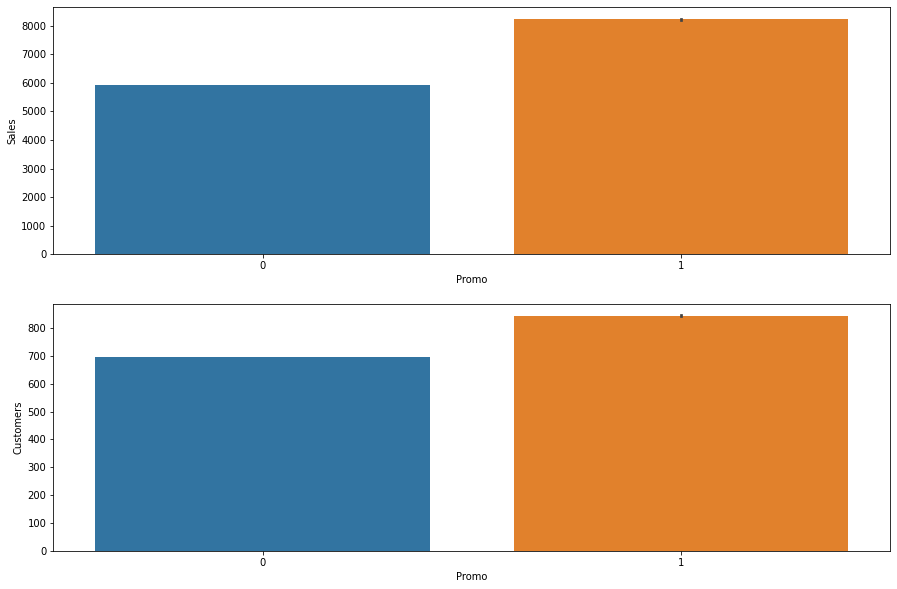

In [ ]:
# Check if the Promo column has any efffect on sales and customers.

plt.figure(figsize=[15,10])

plt.subplot(211) # 2 rows 1 colum 1st plot
sns.barplot(x = 'Promo', y = 'Sales', data = df_all)

plt.subplot(212) # 2 rows 1 colum 2nd plot
sns.barplot(x = 'Promo', y = 'Customers', data = df_all)

# ***FACEBOOK PROPHET***
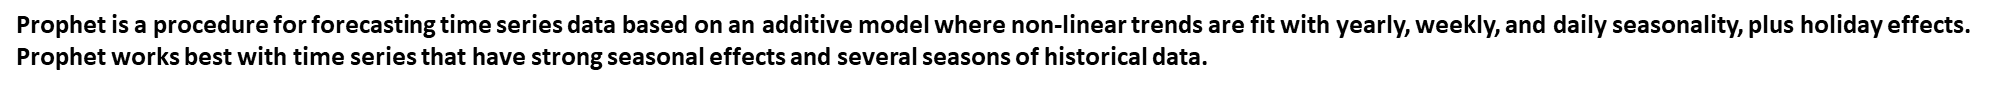


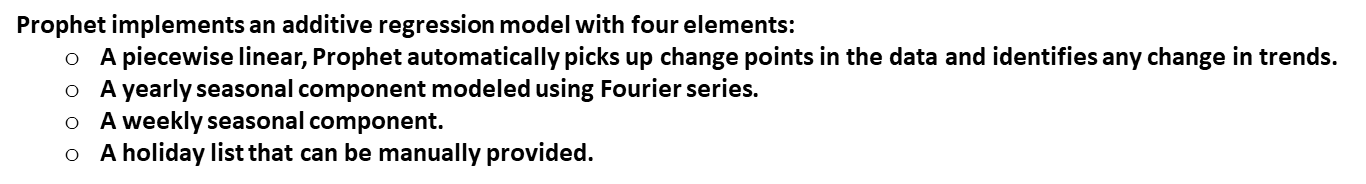

# ***TRAIN THE MODEL***

In [110]:
from fbprophet import Prophet

In [111]:
df_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Months,Date_of_month
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [112]:
# ds--> Date
#y --> Sales
  # Function that takes in the data frame, storeID, and number of future period forecast
  # The function then generates date/sales columns in Prophet format
  # The function then makes time series predictions

def sales_prediction(Store_ID, sales_df, periods):
  saled_df= sales_df[sales_df['Store']== Store_ID]
  sales_df = sales_df[['Date','Sales']].rename(columns={'Date':'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure= model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2 = model.plot_components(forecast)
  # return sales_df--> this was for validation purpose only. but not required after model building.
  # After the model building tep we will get the graphical visualisation of figure 1, and figure 2.
   


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


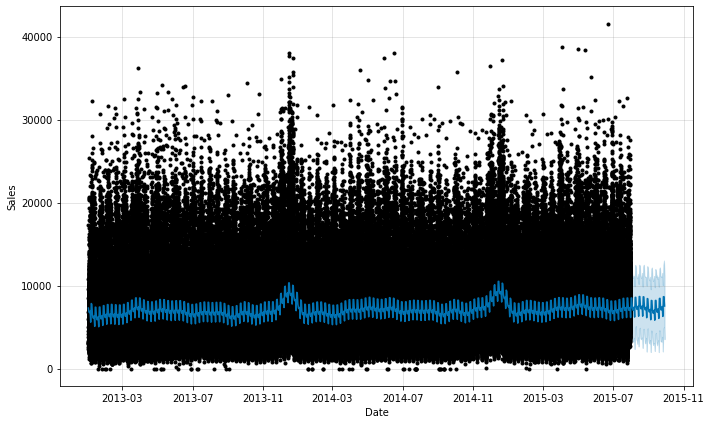

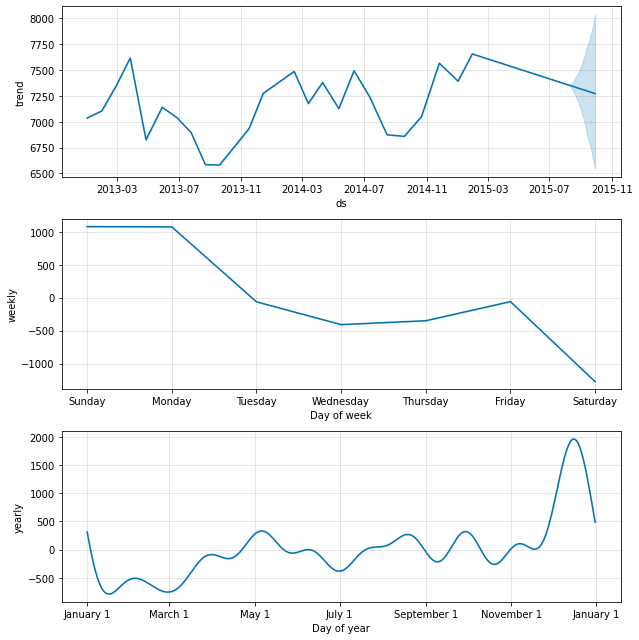

In [113]:
sales_prediction(10, df_all, 60)

### ***TRAIN THE MODEL PART B***

In [ ]:
#StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
#SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools

In [114]:
def sales_prediction(Store_ID, sales_df, holidays, periods):
  # Function that takes in the storeID and returns two date/sales columns in Prophet format
  # Format data to fit prophet 

  sales_df = sales_df[ sales_df['Store'] == Store_ID ]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
  sales_df = sales_df.sort_values('ds')
  
  model    = Prophet(holidays = holidays)
  model.fit(sales_df)
  future   = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  figure   = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2  = model.plot_components(forecast)

In [115]:
# Get all the dates ppertaining to school holidays
school_holidays = df_all[df_all['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [116]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [117]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                                'holiday': 'school_holiday'})

In [118]:
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [ ]:
# Get all the dates ppertaining to state holidays
state_holidays = df_all[ (df_all['StateHoliday'] == 'a') | (df_all['StateHoliday'] == 'b') | (df_all['StateHoliday'] == 'c')  ].loc[:, 'Date'].values
state_holidays.shape

(910,)

In [ ]:
state_holidays= pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})

In [ ]:
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [ ]:
# concatenate both school and state holidays 
school_state_holidays = pd.concat((state_holidays, school_holidays))

In [ ]:
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


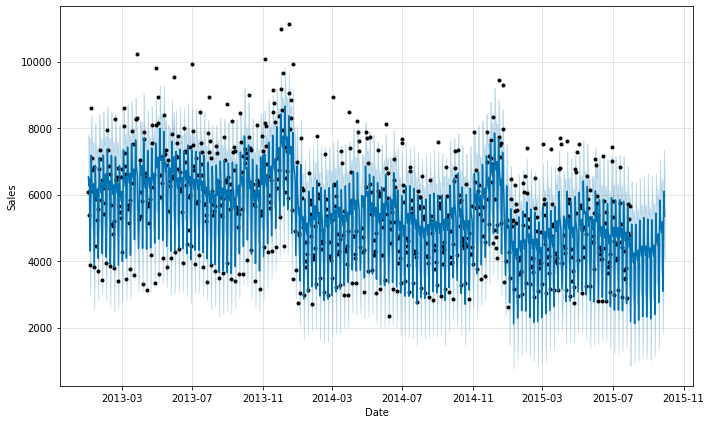

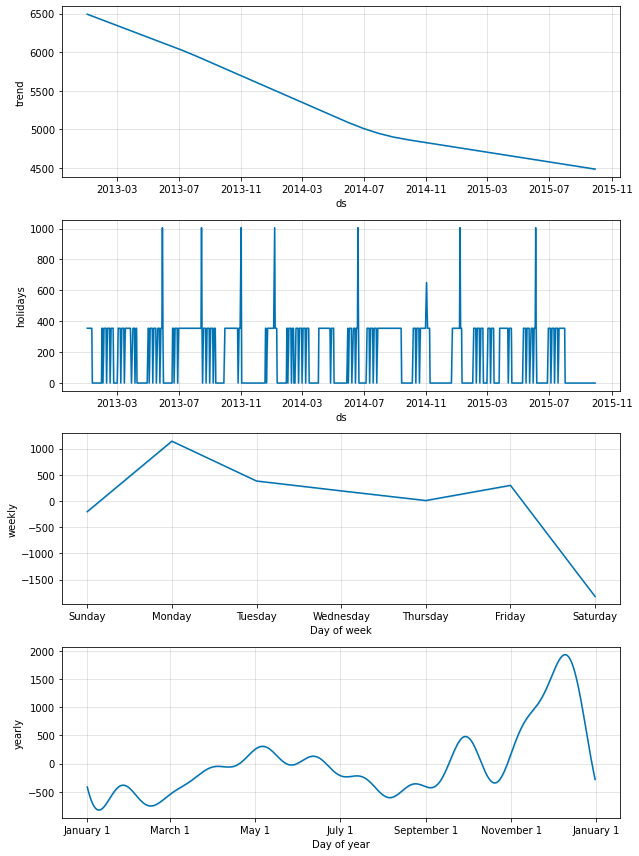

In [ ]:
# Let's make predictions using holidays for a specific store
sales_prediction(6, df_all, school_state_holidays, 60)